<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Load-Training-and-Testing-Sets" data-toc-modified-id="Load-Training-and-Testing-Sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Training and Testing Sets</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Process-the-Data" data-toc-modified-id="Process-the-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Process the Data</a></span></li></ul></li><li><span><a href="#Autoencoder" data-toc-modified-id="Autoencoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build the Model</a></span><ul class="toc-item"><li><span><a href="#Select-Loss-Function-and-Optimizer" data-toc-modified-id="Select-Loss-Function-and-Optimizer-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Select Loss Function and Optimizer</a></span></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Evaluate-Model-Performance-on-Test-Set" data-toc-modified-id="Evaluate-Model-Performance-on-Test-Set-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluate Model Performance on Test Set</a></span></li></ul></li></ul></div>

# Hello, World!
Generating samples from MNIST with Autoencoders.

Following, in part, [this](https://keras.io/examples/variational_autoencoder_deconv/) and [this](https://blog.keras.io/building-autoencoders-in-keras.html) Keras tutorial.

## Import Packages

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Lambda, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse


# Helper libraries
import numpy as np

# Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sn    # Heatmap for confusion matrix

## Import Data

In [2]:
mnist = tf.keras.datasets.mnist

### Load Training and Testing Sets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Explore the Data

(60000, 28, 28)
0
255


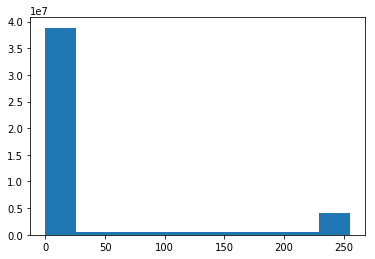

5


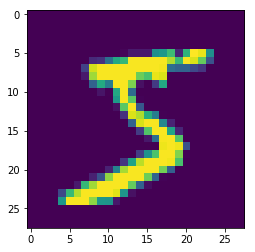

(10000, 28, 28)
0
255


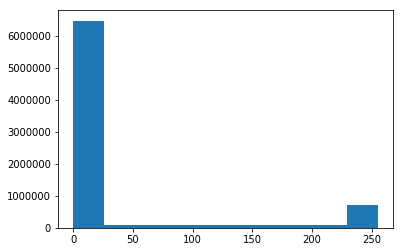

7


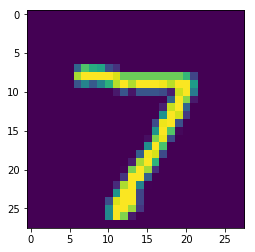

In [4]:
print( x_train.shape )
print( np.min( x_train ) )
print( np.max( x_train ) )

_ = plt.hist(x_train.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_train[0,:,:], interpolation='nearest')
print( y_train[0] )
plt.show()

print( x_test.shape )
print( np.min( x_test ) )
print( np.max( x_test ) )

_ = plt.hist(x_test.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_test[0,:,:], interpolation='nearest')
print( y_test[0] )
plt.show()

### Process the Data

In [5]:
# Normalize the data 
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

#y_train = to_categorical( y_train, num_classes = 10 )
#y_test = to_categorical( y_test, num_classes = 10 )

## Classification
Mainly used to determine how good of a job the autoencoder does as reconstruction. 

### Build the Model

In [6]:
# Define type of model
classification = tf.keras.models.Sequential()

# Convolutional layers
classification.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
classification.add(MaxPooling2D((2, 2)))
classification.add(Conv2D(64, (3, 3), activation='relu'))
classification.add(MaxPooling2D((2, 2)))
classification.add(Conv2D(64, (3, 3), activation='relu'))

# Standard feed forward, fully connected layers
classification.add(Flatten())
classification.add(Dense(64, activation='relu'))
classification.add(Dense(10, activation='softmax'))

In [14]:
classification.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

#### Select Loss Function and Optimizer


In [7]:
classification.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [8]:
classification.fit(x_train, y_train, epochs=5)

W0826 10:04:57.698560 4312647104 deprecation.py:323] From /Users/josh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 394us/sample - loss: 0.1499 - accuracy: 0.9542
Epoch 2/5
60000/60000 [==============================] - 22s 362us/sample - loss: 0.0491 - accuracy: 0.9847
Epoch 3/5
60000/60000 [==============================] - 22s 359us/sample - loss: 0.0345 - accuracy: 0.9892
Epoch 4/5
60000/60000 [==============================] - 21s 350us/sample - loss: 0.0261 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.0203 - accuracy: 0.9934


### Test Model

10000/10000 [==============================] - 1s 99us/sample - loss: 0.0355 - accuracy: 0.9886


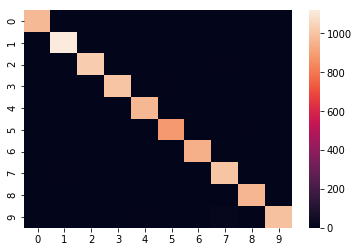

In [9]:
classification.evaluate(x_test, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=classification.predict(x_test), axis=1), y_test )
sn.heatmap( confusion )

## CNN Autoencoder

### Build the Model

In [10]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

#### Select Loss Function and Optimizer

In [11]:
# loss function is usually either the mean-squared error or cross-entropy between the output and the input, known as the reconstruction loss, which penalizes the network for creating outputs different from the input
autoencoder.compile(optimizer='adam',           # Optimizer favored over standard gradient decent
                    loss='binary_crossentropy', # Standard loss for multiclass classification
                    metrics=['mse'])       # Typical metric for classification performance

### Train Model

In [12]:
autoencoder.fit(x_train, x_train, 
                epochs=10,
                batch_size=128,      
                shuffle=True,
                validation_data=(x_test, x_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 614us/sample - loss: 0.2250 - mse: 0.0543 - val_loss: 0.1431 - val_mse: 0.0273
Epoch 2/10
60000/60000 [==============================] - 36s 595us/sample - loss: 0.1355 - mse: 0.0247 - val_loss: 0.1276 - val_mse: 0.0221
Epoch 3/10
60000/60000 [==============================] - 36s 593us/sample - loss: 0.1251 - mse: 0.0211 - val_loss: 0.1212 - val_mse: 0.0198
Epoch 4/10
60000/60000 [==============================] - 35s 585us/sample - loss: 0.1192 - mse: 0.0191 - val_loss: 0.1157 - val_mse: 0.0180
Epoch 5/10
60000/60000 [==============================] - 36s 608us/sample - loss: 0.1154 - mse: 0.0178 - val_loss: 0.1124 - val_mse: 0.0169
Epoch 6/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1125 - mse: 0.0169 - val_loss: 0.1102 - val_mse: 0.0162
Epoch 7/10
60000/60000 [==============================] - 35s 581us/sample - loss: 0.1103 - mse: 0.0161 

### Evaluate Model Performance on Test Set

In [63]:
decoded_imgs = model.predict(x_test)

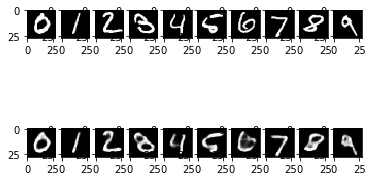

In [64]:
for i in range( 10 ):
    index = np.where( y_test == i )[0][0]
    plt.subplot( 2, 10, i+1 )
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    plt.subplot( 2, 10, i+11 )
    plt.imshow(decoded_imgs[index].reshape(28, 28))
    plt.gray()


### Evaluate Model Performance with Classifier

10000/10000 [==============================] - 1s 94us/sample - loss: 0.2439 - accuracy: 0.9270


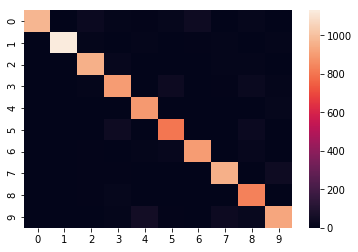

In [65]:
classification.evaluate(decoded_imgs, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=classification.predict(decoded_imgs), axis=1), y_test )
sn.heatmap( confusion )

## Variational Autoencoder

In [16]:
# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# then z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [43]:
# network parameters
image_size = x_train.shape[1]
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 16
latent_dim = 10
epochs = 10

### Encoder

In [39]:
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

#for i in range(2):
#    filters *= 2
x = Conv2D(filters=32,
           kernel_size=kernel_size,
           activation='relu',
           strides=2,
           padding='same')(x)

x = Conv2D(filters=64,
           kernel_size=kernel_size,
           activation='relu',
           strides=2,
           padding='same')(x)

# shape info needed to build decoder model
shape = K.int_shape(x)

# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
#plot_model(encoder, to_file='vae_cnn_encoder.png', show_shapes=True)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 7, 7, 64)     18496       conv2d_16[0][0]                  
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 3136)         0           conv2d_17[0][0]                  
____________________________________________________________________________________________

### Decoder

In [40]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

#for i in range(2):
#    x = Conv2DTranspose(filters=filters,
#                        kernel_size=kernel_size,
#                        activation='relu',
#                        strides=2,
#                        padding='same')(x)
#    filters //= 2|

#for i in range(2):
x = Conv2DTranspose(filters=64,
                    kernel_size=kernel_size,
                    activation='relu',
                    strides=2,
                    padding='same')(x)
#    filters //= 2
x = Conv2DTranspose(filters=32,
                    kernel_size=kernel_size,
                    activation='relu',
                    strides=2,
                    padding='same')(x)


outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
#plot_model(decoder, to_file='vae_cnn_decoder.png', show_shapes=True)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 10)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3136)              34496     
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         289       
Total params: 90,177
Trainable params: 90,177
Non-trainable params: 0
_______________________________________________________

### VAE

In [41]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

### Define Loss Function

In [42]:
reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

W0826 16:58:39.597929 4312647104 training_utils.py:1237] Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.


Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 10), (None,  69348       encoder_input[0][0]              
__________________________________________________________________________________________________
decoder (Model)                 (None, 28, 28, 1)    90177       encoder[1][2]                    
__________________________________________________________________________________________________
tf_op_layer_Reshape_9 (TensorFl [(None,)]            0           decoder[1][0]                    
________________________________________________________________________________________________

In [44]:
vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 699us/sample - loss: 49.1496 - val_loss: 39.8850
Epoch 2/10
60000/60000 [==============================] - 42s 694us/sample - loss: 38.1374 - val_loss: 37.5614
Epoch 3/10
60000/60000 [==============================] - 42s 692us/sample - loss: 34.9045 - val_loss: 33.2568
Epoch 4/10
60000/60000 [==============================] - 41s 690us/sample - loss: 32.9360 - val_loss: 31.7282
Epoch 5/10
60000/60000 [==============================] - 42s 696us/sample - loss: 31.9479 - val_loss: 31.2969
Epoch 6/10
60000/60000 [==============================] - 42s 694us/sample - loss: 31.3824 - val_loss: 31.0257
Epoch 7/10
60000/60000 [==============================] - 42s 707us/sample - loss: 30.9500 - val_loss: 31.1079
Epoch 8/10
60000/60000 [==============================] - 42s 703us/sample - loss: 30.6035 - val_loss: 30.7381
Epoch 9/10
60000/60000 [==============================] - 42s 